In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from gross import GrossErrorModel

sns.set_context("talk")

In [2]:
%load_ext autoreload
%autoreload 2

## Data setup

As $\epsilon$ increases, the probability of an outlier increases.

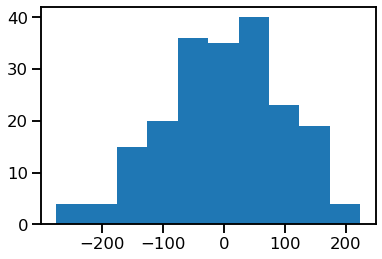

In [3]:
# Sample data with no outliers
gem = GrossErrorModel(n_features=10, n_targets=2, n_informative=5)
X_train, y_train = gem._sample_train(epsilon=0, n_iter=25, n_train=200)

# Plot the distribution of the training labels
plt.hist(y_train[:, 0])
plt.show()

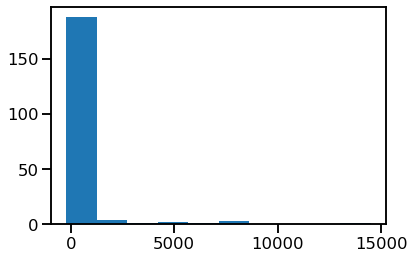

In [4]:
# Sample data with outliers
gem = GrossErrorModel(n_features=10, n_targets=2, n_informative=5, transform=np.square)
X_train, y_train = gem._sample_train(epsilon=0.1, n_iter=25, n_train=200)

# Plot the distribution of the training labels
plt.hist(y_train[:, 0])
plt.show()

## Plot simulation results

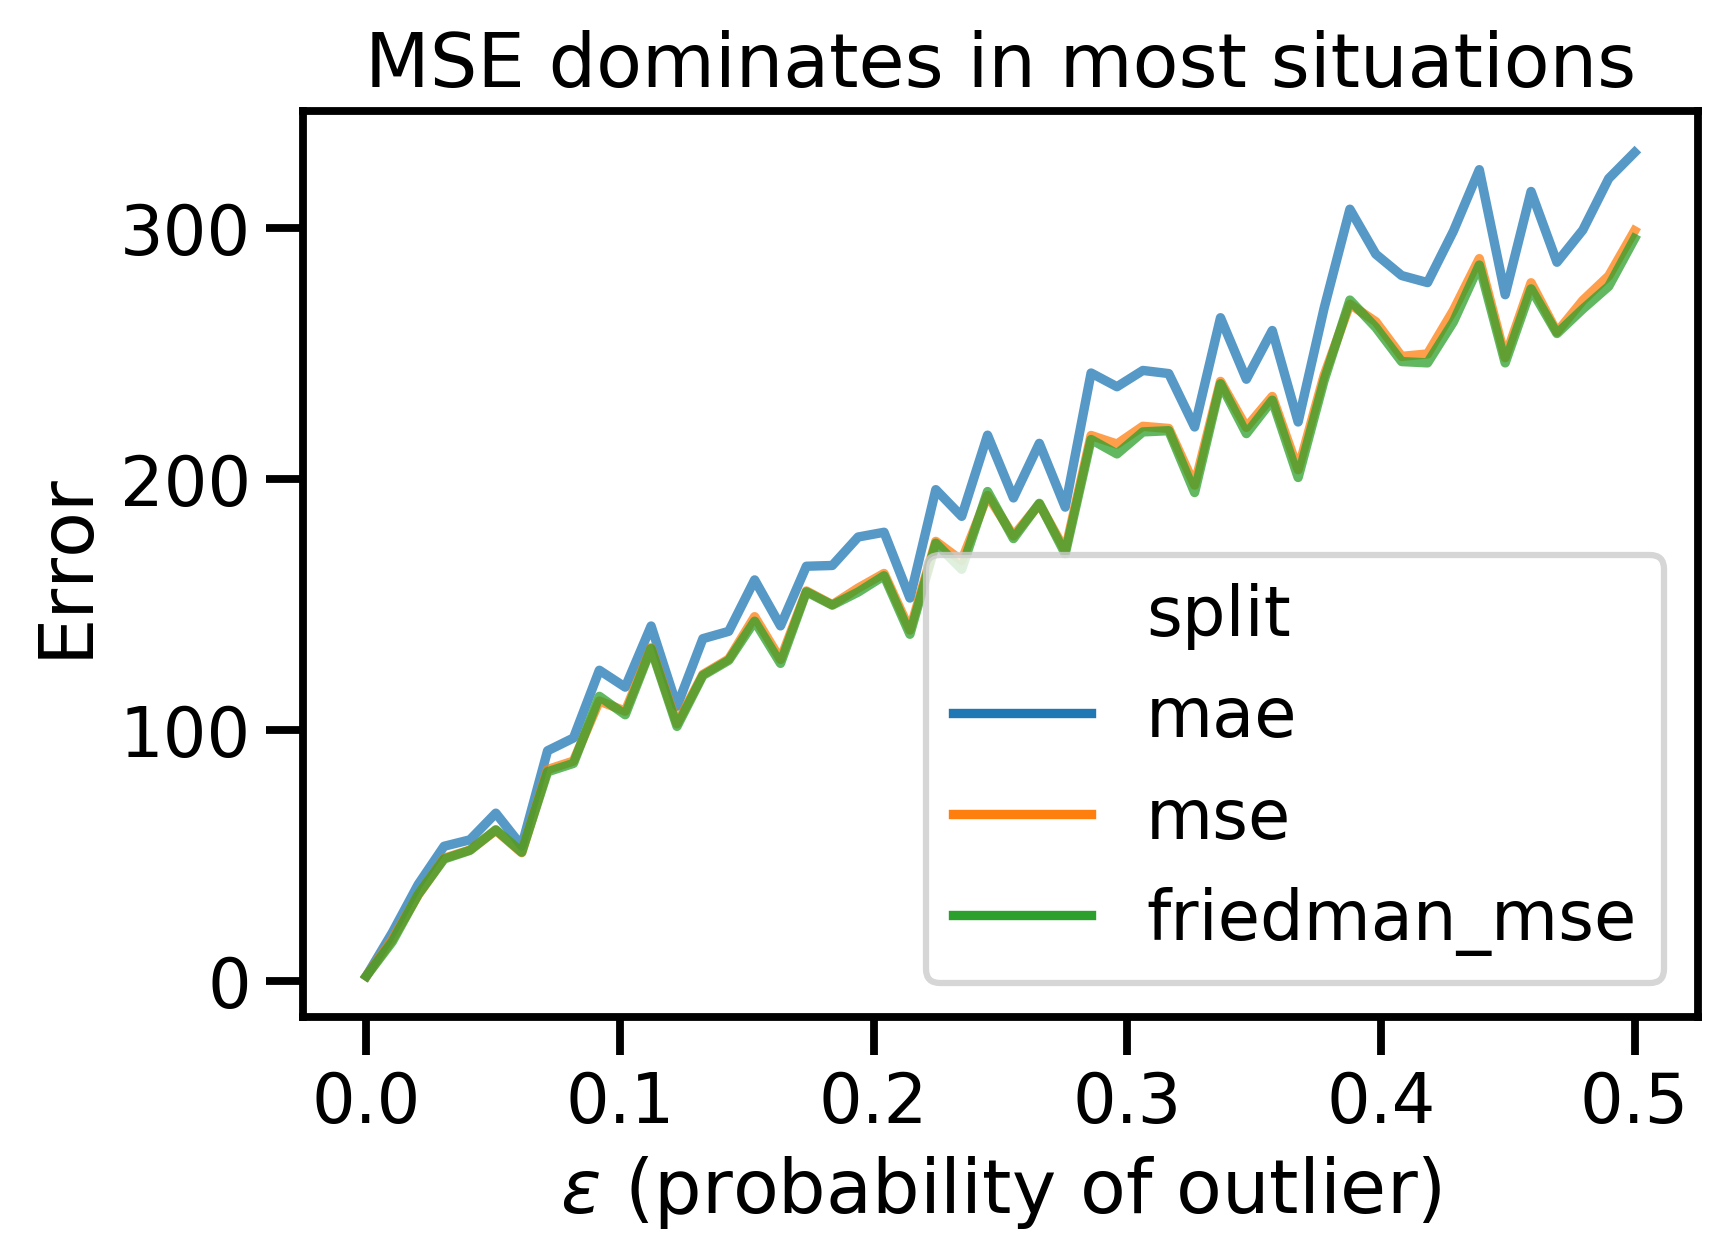

In [5]:
df = pd.read_csv("sim2_results.csv", index_col="Unnamed: 0")
df = pd.melt(
    df,
    id_vars=["n_features", "n_targets", "epsilon"],
    value_vars=["mae", "mse", "friedman_mse"],
    var_name="split",
    value_name="mse",
)
df["split"].str.upper()
df.head()

fig, ax = plt.subplots(dpi=300)
f = sns.lineplot(x="epsilon", y="mse", hue="split", data=df, alpha=0.75, ax=ax)
f.set(
    xlabel=r"$\epsilon$ (probability of outlier)",
    ylabel="Error",
    title="MSE dominates in most situations"
)
plt.show()

In [6]:
df = pd.read_csv("sim3_results.csv", index_col="Unnamed: 0")
df

,n_features,n_targets,epsilon,mae_score,mse_score,friedman_mse_score,mae_std,mse_std,friedman_mse_std
0,10.0,2.0,0.000000,3.682807,3.652469,3.790396,0.037814,0.037673,0.033615
1,10.0,2.0,0.055556,3.810085,3.778829,3.886332,0.031020,0.031960,0.030716
2,10.0,2.0,0.111111,3.901255,3.849310,3.952115,0.033747,0.033965,0.030881
3,10.0,2.0,0.166667,3.923464,3.867187,3.967767,0.035563,0.034258,0.028736
4,10.0,2.0,0.222222,3.965894,3.889341,3.974671,0.039481,0.035046,0.033053
5,10.0,2.0,0.277778,4.043813,3.947979,4.027146,0.029843,0.030668,0.027450
6,10.0,2.0,0.333333,4.089105,4.013652,4.076552,0.026295,0.026912,0.026009
7,10.0,2.0,0.388889,4.184021,4.081691,4.128662,0.030606,0.031252,0.031374
8,10.0,2.0,0.444444,3.439699,3.333553,3.381307,0.028803,0.028313,0.028022
9,10.0,2.0,0.500000,4.184518,4.090924,4.138608,0.030941,0.031096,0.032695


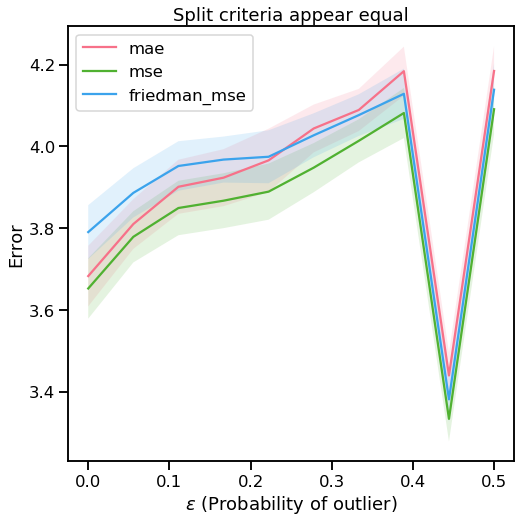

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
c = sns.color_palette("husl", n_colors=3)

x = df["epsilon"].values

for i, criterion in enumerate(["mae", "mse", "friedman_mse"]):

    col = criterion + "_score"
    y = df[col].values
    ax.plot(x, y, label=criterion, c=c[i])

    col = criterion + "_std"
    errors = df[col].values

    ax.fill_between(
        x=x, 
        y1=y + 1.96 * errors, 
        y2=y - 1.96 * errors, 
        where=(y + 1.96 * errors >= y - 1.96 * errors), 
        facecolor=c[i], 
        alpha=0.15,
        interpolate=True
    )

ax.set(
    xlabel=r"$\epsilon$ (Probability of outlier)",
    ylabel="Error",
    title="Split criteria appear equal",
)

plt.legend()
plt.show()